#### Récupérer les donnes depuis l'API de l'insee (donnees-locale)

In [1]:
import requests
server = "https://api.insee.fr/donnees-locales/V0.1/donnees/"
res = requests.get(f"{server}geo-STOCD@GEO2023RP2020/COM-01004.ALL")
res.status_code

404

#### Récupérer les données depuis l'API de l'insee (MELODI)

In [2]:
import requests
import json

server = "https://api.insee.fr/melodi"
res = requests.get(f"{server}/catalog/all")

for r in res.json():
    print(r["identifier"], r["title"][0]["content"])

DD_CNA_AGREGATS Produit Intérieur Brut (PIB) et grands agrégats économiques
DD_CNA_APU Comptes des administrations publiques
DD_CNA_BRANCHES Activité des branches de l'économie
DD_CNA_CONSO_MENAGES_COICOP Consommation des ménages par fonction
DD_CNA_CONSO_MENAGES_PRODUITS Consommation des ménages par produit
DD_CNA_ECH_EXT Échanges extérieurs
DD_CNA_PATRIMOINE Comptes de patrimoine
DD_CNA_PATRIMOINE_BRANCHES Comptes de patrimoine par branches
DD_CNA_TEE Tableau économique d'ensemble
DD_EEC_ANNUEL Activité, emploi et chômage - résultats annuels 2023
DD_EEC_SERIES Activité, emploi et chômage - séries longues
DS_ANTIPOL Enquête annuelle sur les investissements pour protéger l'environnement (Antipol)
DS_BPE Dénombrement des équipements (commerce, sport, services, santé…)
DS_BPE_EDUCATION Enseignement : dénombrement et caractéristiques des équipements
DS_BPE_EVOLUTION Évolution du nombre d'équipements et services
DS_BPE_SPORT_CULTURE Sport, loisirs et culture : dénombrement, caractéristique

In [3]:
catalogs_ids = ["DS_ERFS_CHAMP_CONST_SL", "DS_ERFS_INDIVIDU", "DD_EEC_ANNUEL"]

# Afficher les métadonnées liées aux différents 
for cid in catalogs_ids:
    url = f"{server}/catalog/{cid}"
    res = requests.get(url)
    print(res.json())

{'identifier': 'DS_ERFS_CHAMP_CONST_SL', 'uri': 'http://id.insee.fr/catalogues/jeuDeDonnees/b7968a57-5065-4a81-a796-3c3ce4da1a77', 'title': [{'lang': 'fr', 'content': 'Indicateurs de pauvreté et de niveau de vie (séries longues à champ constant)'}, {'lang': 'en', 'content': 'Poverty and living standards indicators (long-term series with a constant scope)'}], 'subtitle': [{'lang': 'fr', 'content': 'Enquête revenu fiscaux et sociaux (ERFS)'}, {'lang': 'en', 'content': 'Enquête revenu fiscaux et sociaux (ERFS)'}], 'description': [{'lang': 'fr', 'content': "Les indicateurs sont calculés au niveau de l'individu.\nLes indicateurs de pauvreté sont les seuils et taux de pauvreté ainsi que le nombre de personnes pauvres (au seuil de 60 %).\nLes indicateurs de niveau de vie sont la médiane et la moyenne, le 1er et 9e décile ainsi que le rapport interdécile (D9/D1).\n\nLe champ comporte les individus vivant en France métropolitaine, appartenant aux ménages ordinaires dont le revenu déclaré est po

In [4]:
import pandas as pd

res = requests.get(f"{server}/data/{cid}")
data = res.json()

title = data['title']['fr']
identifier = data['identifier']

observations = data["observations"]
extracted_data = []

for obs in observations:
    dimensions = obs["dimensions"]

    if 'attributes' in obs:
        attributes = obs["attributes"]
    else:
        attributes = None

    # Suivant les jeux de données value peut être absent
    if 'value' in obs['measures']['OBS_VALUE_NIVEAU']:
        measures = obs['measures']['OBS_VALUE_NIVEAU']['value']
    else:
        mesures = None

    # on rassemble tout dans un objet
    if 'attributes' in obs:
        combined_data = {**dimensions,**attributes, 'OBS_VALUE_NIVEAU': measures}
    else:
        combined_data = {**dimensions, 'OBS_VALUE_NIVEAU': measures}
    
    extracted_data.append(combined_data)

df = pd.DataFrame(extracted_data)

print(f'Jeu de données : {identifier} \nTitre : {title} ')
print(df)


Jeu de données : DD_EEC_ANNUEL 
Titre : Activité, emploi et chômage - résultats annuels 2023 
    PCS IMMI                    EEC_MEASURE SEX EDUC ANCSORFI2 UNDEREMP  \
0    _T   _T                            EMP   M   _T        _T       _T   
1    _T   _T                         UNEMPB   F   _T        _T       _T   
2    46   _T                            EMP   F   _T        _T       _T   
3    _T   10                          UNEMP  _T   _T        _T       _T   
4    _T   _T  PT_EMPFORM_IN_EMP_BY_ACTIVITY   F   _T        _T       _T   
..   ..  ...                            ...  ..  ...       ...      ...   
995  _T   _T                         ACTPOP  _T  4T5        _T       _T   
996  _T   _T      PT_PCS_IN_EMP_BY_ACTIVITY  _T   _T        _T       _T   
997  _T   _T                       UNDEREMP  _T   _T        _T       _T   
998  10   _T      PT_PCS_IN_EMP_BY_ACTIVITY   F   _T        _T       _T   
999  34   _T           PT_AGE_IN_EMP_BY_PCS  _T   _T        _T       _T   

    E

#### Récupération des données avec `pynsee`

In [5]:
from pynsee.localdata import get_local_metadata

metadata = get_local_metadata()
var_labels = metadata[metadata.DATASET == "RP"].VARIABLES_label_fr.unique().tolist()
f_var_labels = [l for l in var_labels if "profession" in l or "emploi" in l or "travail" in l ]
len(f_var_labels), f_var_labels

/home/bsellier/simulateur_conseil_municipal/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(70,
 ['Catégorie socioprofessionnelle regroupée (6 postes)',
  'Activité économique agrégée en 5 postes (NA, 2008) - Catégorie socioprofessionnelle regroupée (6 postes) - Sexe',
  'Activité économique agrégée en 5 postes (NA, 2008) - Catégorie socioprofessionnelle détaillée (29 postes) - Sexe',
  'Sexe - Catégorie socioprofessionnelle regroupée (6 postes)',
  "Sexe - Conditions d'emploi",
  "Statut professionnel détaillé (4 postes) - Âge regroupé en 6 tranches, de moins de 20 ans jusqu'à 65 ans ou plus - Temps de travail - Sexe",
  'Statut professionnel détaillé (4 postes) - Âge quinquennal de moins de 20 ans à 65 ans ou plus - Temps de travail - Sexe',
  "Statut professionnel regroupé (2 postes) - Âge regroupé en 6 tranches, de moins de 20 ans jusqu'à 65 ans ou plus - Temps de travail - Sexe",
  'Statut professionnel regroupé (2 postes) - Âge quinquennal de moins de 20 ans à 65 ans ou plus - Temps de travail - Sexe',
  'Statut professionnel regroupé (2 postes) - Activité économique e

On va s'intéresser aux variables : "Catégorie socioprofessionnelle regroupée (8 postes) - Sexe"

In [6]:
metadata[metadata.VARIABLES_label_fr == "Catégorie socioprofessionnelle regroupée (8 postes) - Sexe"]

,VARIABLES,UNIT,DATASET_VERSION,DATASET,VARIABLES_label_fr,UNIT_label_fr,GEO_DATE,DATA_DATE,DATASET_label_fr
96,CS1_8-SEXE,POP,GEO2021RP2018,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2021.0,2018.0,Recensement de la population
262,CS1_8-SEXE,POP,GEO2020RP2017,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2020.0,2017.0,Recensement de la population
428,CS1_8-SEXE,POP,GEO2019RP2016,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2019.0,2016.0,Recensement de la population
594,CS1_8-SEXE,POP,RP2015,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2017.0,2015.0,Recensement de la population
788,CS1_8-SEXE,POP,RP2014,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2016.0,2014.0,Recensement de la population
1020,CS1_8-SEXE,POP,GEO2021RP2013,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2021.0,2013.0,Recensement de la population
1251,CS1_8-SEXE,POP,RP2013,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2015.0,2013.0,Recensement de la population
1366,CS1_8-SEXE,POP,GEO2020RP2012,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2020.0,2012.0,Recensement de la population
1510,CS1_8-SEXE,POP,RP2012,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2014.0,2012.0,Recensement de la population
1619,CS1_8-SEXE,POP,GEO2019RP2011,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2019.0,2011.0,Recensement de la population


In [7]:
from pynsee.localdata import get_nivgeo_list

nivgeo_list = get_nivgeo_list()
nivgeo_list

,NIVGEO,NIVGEO_label_fr,NIVGEO_label_en
0,COM,communes et arrondissements municipaux,municipalities and municipal districts
1,DEP,départements,departments
2,REG,régions,regions
3,METRODOM,France métropolitaine,metropolitan France
4,FE,France,France
5,ARR,arrondissements,districts
6,EPCI,intercommunalités,intermunicipal authorities
7,AAV2020,aires d'attraction des villes 2020,functional areas 2020
8,UU2020,unités urbaines 2020,urban unit 2020
9,ZE2020,zones d'emploi 2020,employment zone 2020


In [8]:
from pynsee.localdata.get_geo_list import get_geo_list

city_list = get_geo_list('communes')
city_list

,TITLE,TYPE,DATECREATION,TITLE_SHORT,CODE,URI,TITLE_REG,CODE_REG,CODE_DEP,TITLE_DEP
0,Les Abymes,Commune,1943-01-01,Abymes,97101,http://id.insee.fr/geo/commune/90272c00-7732-4...,Guadeloupe,01,971,Guadeloupe
1,Anse-Bertrand,Commune,1943-01-01,Anse-Bertrand,97102,http://id.insee.fr/geo/commune/be8710ee-6214-4...,Guadeloupe,01,971,Guadeloupe
2,Baie-Mahault,Commune,1943-01-01,Baie-Mahault,97103,http://id.insee.fr/geo/commune/84b3be9f-f07a-4...,Guadeloupe,01,971,Guadeloupe
3,Baillif,Commune,1943-01-01,Baillif,97104,http://id.insee.fr/geo/commune/f008d6d1-4e05-4...,Guadeloupe,01,971,Guadeloupe
4,Basse-Terre,Commune,1943-01-01,Basse-Terre,97105,http://id.insee.fr/geo/commune/6882f7d3-5560-4...,Guadeloupe,01,971,Guadeloupe
...,...,...,...,...,...,...,...,...,...,...
34870,Zalana,Commune,1976-01-01,Zalana,2B356,http://id.insee.fr/geo/commune/f2e2b9e5-14de-4...,Corse,94,2B,Haute-Corse
34871,Zilia,Commune,1976-01-01,Zilia,2B361,http://id.insee.fr/geo/commune/b472ee1a-11a5-4...,Corse,94,2B,Haute-Corse
34872,Zuani,Commune,1976-01-01,Zuani,2B364,http://id.insee.fr/geo/commune/3c315c87-c066-4...,Corse,94,2B,Haute-Corse
34873,San-Gavino-di-Fiumorbo,Commune,1976-01-01,San-Gavino-di-Fiumorbo,2B365,http://id.insee.fr/geo/commune/f54a6198-9cd7-4...,Corse,94,2B,Haute-Corse


In [9]:
def get_code_from_city(city):
    code = city_list[(city_list["TITLE"] == city) | (city_list["TITLE_SHORT"] == city)]["CODE"]
    if len(code) == 0:
        raise Exception("La commune donnée en entrée n'existe pas")
    return code.iloc[0]


get_code_from_city("Lyon")

'69123'

In [10]:
from pynsee.localdata import get_local_data

CS1_8_SEXE = get_local_data("CS1_8-SEXE", "GEO2020RP2017", nivgeo="COM", geocodes=[69123])
CS1_8_SEXE

,CODEGEO,NIVGEO,UNIT_label_fr,UNIT,CS1_8,SEXE,OBS_VALUE,SEXE_label,CS1_8_label,DATASET_VERSION,DATASET_NAME,DATA_DATE
0,69123,COM,Population,POP,ENS,ENS,436734.580567,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
1,69123,COM,Population,POP,1,ENS,50.325200,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
2,69123,COM,Population,POP,2,ENS,12485.839849,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
3,69123,COM,Population,POP,3,ENS,85534.012141,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
4,69123,COM,Population,POP,4,ENS,75387.251969,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
5,69123,COM,Population,POP,5,ENS,61538.533418,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
6,69123,COM,Population,POP,6,ENS,27662.439547,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
7,69123,COM,Population,POP,7,ENS,79314.036100,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
8,69123,COM,Population,POP,8,ENS,94762.142342,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
9,69123,COM,Population,POP,ENS,1,201797.277262,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017


In [11]:
CS1_8 = CS1_8_SEXE[(CS1_8_SEXE["SEXE"] == "ENS") & (CS1_8_SEXE["CS1_8"] != "ENS")]
CS1_8

,CODEGEO,NIVGEO,UNIT_label_fr,UNIT,CS1_8,SEXE,OBS_VALUE,SEXE_label,CS1_8_label,DATASET_VERSION,DATASET_NAME,DATA_DATE
1,69123,COM,Population,POP,1,ENS,50.325200,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
2,69123,COM,Population,POP,2,ENS,12485.839849,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
3,69123,COM,Population,POP,3,ENS,85534.012141,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
4,69123,COM,Population,POP,4,ENS,75387.251969,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
5,69123,COM,Population,POP,5,ENS,61538.533418,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
6,69123,COM,Population,POP,6,ENS,27662.439547,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
7,69123,COM,Population,POP,7,ENS,79314.036100,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017
8,69123,COM,Population,POP,8,ENS,94762.142342,Sexe,Catégorie socioprofessionnelle regroupée (8 po...,GEO2020RP2017,Recensement de la population,2017


#### Exemple pour Lyon

([<matplotlib.patches.Wedge at 0x7fa0d53cfe20>,
 [Text(1.0999999279227446, 0.0003982084337958353, 'Agriculteurs exploitants'),
  Text(1.0954945321563285, 0.09945717679276325, "Artisans, commerçants et chefs d'entreprise"),
  Text(0.7698167134694185, 0.7857367419582361, 'Cadres et professions intellectuelles supérieures'),
  Text(-0.41046491965070003, 1.02054816139962, 'Professions Intermédiaires'),
  Text(-1.07731581277984, 0.222240049348701, 'Employés'),
  Text(-0.9960598575839174, -0.46675985271861864, 'Ouvriers'),
  Text(-0.3906466191080516, -1.028297242522535, 'Retraités'),
  Text(0.8541812972697529, -0.6930904063645393, 'Autres personnes sans activité professionnelle')],
 [Text(0.5999999606851334, 0.00021720460025227378, '0.0%'),
  Text(0.5975424720852701, 0.05424936915968904, '2.9%'),
  Text(0.41990002552877365, 0.42858367743176506, '19.6%'),
  Text(-0.2238899561731091, 0.5566626334907017, '17.3%'),
  Text(-0.5876268069708217, 0.12122184509929143, '14.1%'),
  Text(-0.543305376863

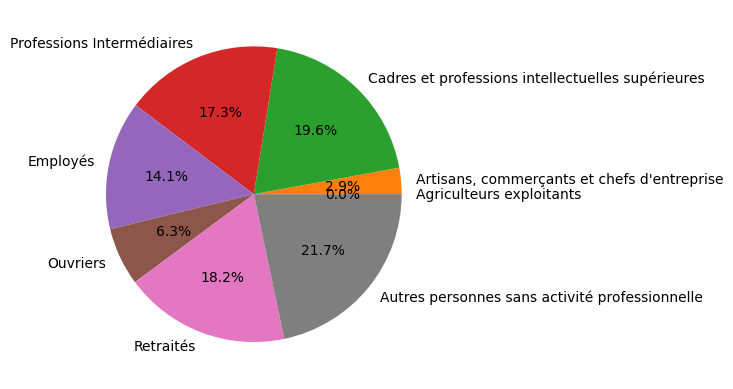

In [12]:
import matplotlib.pyplot as plt

CS1_8_labels = ["Agriculteurs exploitants", "Artisans, commerçants et chefs d'entreprise", "Cadres et professions intellectuelles supérieures",
            "Professions Intermédiaires", "Employés", "Ouvriers", "Retraités", "Autres personnes sans activité professionnelle"]

sizes = CS1_8["OBS_VALUE"].tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=CS1_8_labels, autopct="%1.1f%%")

#### Pour n'importe quelle commune

In [13]:
from matplotlib import __version__
print(__version__)

3.10.3


Les données de catégorie socioprofessionnelles utilisent la nomenclature [PCS-2003](https://www.insee.fr/fr/metadonnees/pcs2003/categorieSocioprofessionnelleAgregee/1).

[0.00023103914052324213, 0.027624043714956824, 0.17298319847692276, 0.1676445518512255, 0.14129555568079147, 0.08240457361771589, 0.18915085891577801, 0.21866617860208634]


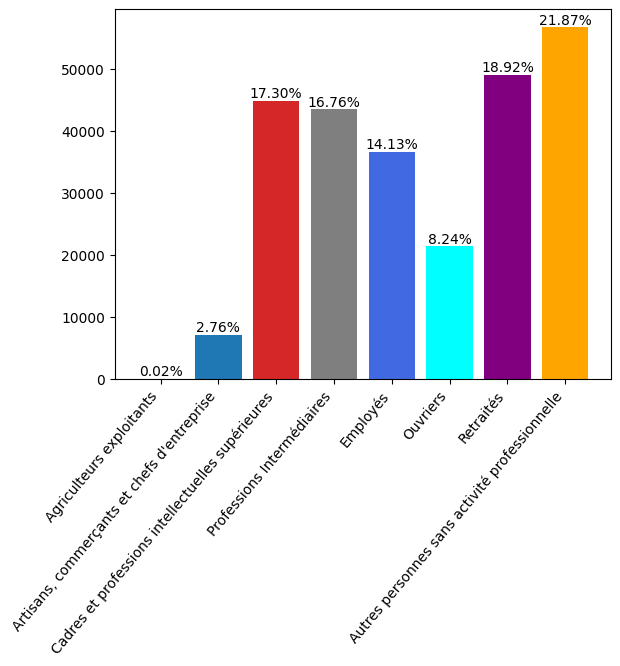

In [14]:
CS1_8_labels = ["Agriculteurs exploitants", "Artisans, commerçants et chefs d'entreprise", "Cadres et professions intellectuelles supérieures",
            "Professions Intermédiaires", "Employés", "Ouvriers", "Retraités", "Autres personnes sans activité professionnelle"]

def chart_from_city(city, type="bar"):
    city_code = get_code_from_city(city)

    CS1_8_SEXE = get_local_data("CS1_8-SEXE", "GEO2020RP2017", nivgeo="COM", geocodes=[city_code])
    CS1_8 = CS1_8_SEXE[(CS1_8_SEXE["SEXE"] == "ENS") & (CS1_8_SEXE["CS1_8"] != "ENS")]


    sizes = CS1_8["OBS_VALUE"].tolist()

    fig, ax = plt.subplots()
    if type == "pie":
        ax.pie(sizes, labels=CS1_8_labels, autopct='%.2f%%')
    else:
        bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:grey', 'royalblue', 'cyan', 'purple', 'orange']
        ax.bar(CS1_8_labels, sizes, color=bar_colors)
        for container in ax.containers:
            print([x / sum(sizes) for x in sizes])
        ax.bar_label(container, [f'{x / sum(sizes):.2%}' for x in sizes])
        plt.xticks(rotation=50, ha='right')


chart_from_city("Nantes", type="bar")

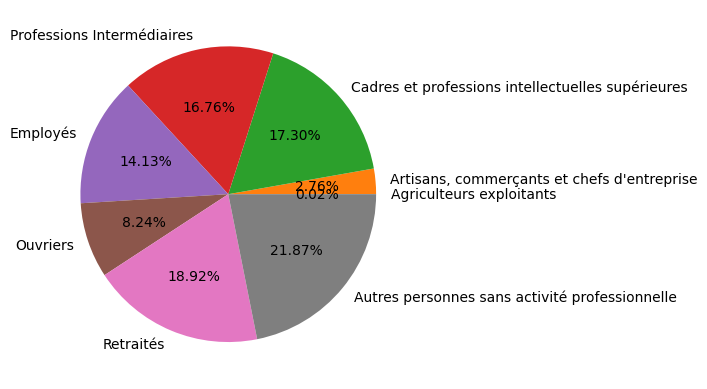

In [15]:
chart_from_city("Nantes", type="pie")